### Objective: Train differents supervised models like: Random Forest, SVM, KNN. To predict music genre, compare the performance and save the results

In [15]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [16]:
# Rutes
OUTPUT_PATH = "../Outputs/"

In [17]:
#Load pre-processed data 
df = pd.read_csv(OUTPUT_PATH + "features_clean_30sec.csv")

In [18]:
# Prepare X and y
X =  df.drop(columns=['label'])
y = df['label']

#Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [19]:
#Divide in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state= 42, stratify=y_encoded)

In [20]:
#Train Models
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state= 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#SVM
svm = SVC(kernel = 'rbf', C = 10, gamma = 'scale')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [21]:
# Test
models = {
    'Random Forest': (y_pred_rf, rf),
    'SVM': (y_pred_svm, svm),
    'KNN': (y_pred_knn, knn)
}

for name, (y_pred, model) in models.items():
    print(f'\n=== {name} ===')
    print ('Accuaracy: ', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))


=== Random Forest ===
Accuaracy:  0.78
              precision    recall  f1-score   support

       blues       0.83      0.75      0.79        20
   classical       0.83      0.95      0.88        20
     country       0.70      0.80      0.74        20
       disco       0.75      0.60      0.67        20
      hiphop       0.67      0.80      0.73        20
        jazz       0.76      0.80      0.78        20
       metal       0.89      0.85      0.87        20
         pop       0.85      0.85      0.85        20
      reggae       0.76      0.80      0.78        20
        rock       0.80      0.60      0.69        20

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200


=== SVM ===
Accuaracy:  0.77
              precision    recall  f1-score   support

       blues       0.81      0.85      0.83        20
   classical       0.74      0.85      0.79        20
     cou

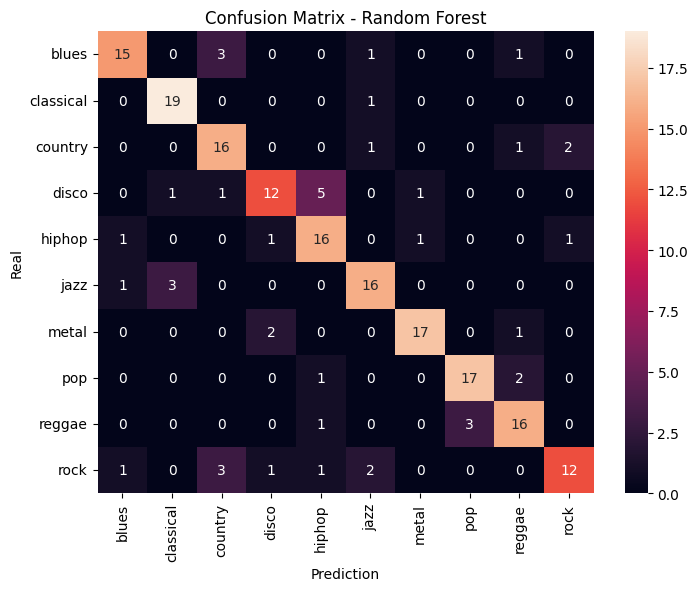

In [22]:
#Confusion matrix Visualization 
plt.figure(figsize=(8, 6))
cm = confusion_matrix (y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels = encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.show()

In [26]:
#Create Dataframe with predictions
#Convert the encoded values ​​to original labels
y_test_labels = encoder.inverse_transform(y_test)
y_pred_rf_labels = encoder.inverse_transform(y_pred_rf)
y_pred_svm_labels = encoder.inverse_transform(y_pred_svm)
y_pred_knn_labels = encoder.inverse_transform(y_pred_knn)

#Create Dataframe for prediction comparisons and real labels
df_results = pd.DataFrame({
    'real_label': y_test_labels,
    'pred_rf': y_pred_rf_labels,
    'pred_svm': y_pred_svm_labels,
    'pred_knn': y_pred_knn_labels
})

#Save the rults:
df_results.to_csv(OUTPUT_PATH + "supervised_predictions.csv", index = False)

In [24]:
# --- Save train models ---
joblib.dump(rf, OUTPUT_PATH + "rf_model.pkl")
joblib.dump(svm, OUTPUT_PATH + "svm_model.pkl")
joblib.dump(knn, OUTPUT_PATH + "knn_model.pkl")
joblib.dump(encoder, OUTPUT_PATH + "label_encoder.pkl")

['../Outputs/label_encoder.pkl']